In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\ANNA DSA\PROJECT\air_quality_data.csv")

In [3]:
data.head()

,City,Date,PM2.5,PM10,NO2,SO2,O3,AQI,AQI_Bucket
0,Delhi,2022-01-13,230.50,355.43,61.28,24.28,75.14,370.0,Very Poor
1,Delhi,2022-01-14,191.47,308.74,54.37,22.47,64.80,365.0,Very Poor
2,Delhi,2022-01-15,177.71,309.85,52.51,19.12,59.73,352.0,Very Poor
3,Delhi,2022-01-16,133.56,231.04,46.86,19.06,54.00,278.0,Poor
4,Delhi,2022-01-17,235.06,353.55,47.86,14.48,64.10,350.0,Very Poor


In [4]:
data['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        1369
Satisfactory    1128
Good             319
Poor             308
Very Poor        158
Severe            61
Name: count, dtype: int64

In [5]:
# Classification function
def classify_health_status(bucket):
    if bucket in ['Good', 'Satisfactory']:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Apply classification
data['Health_Class'] = data['AQI_Bucket'].apply(classify_health_status)

In [6]:
data['Health_Class'].value_counts()

Health_Class
Unhealthy    1902
Healthy      1447
Name: count, dtype: int64

In [7]:
data.isna().sum()

City            0
Date            0
PM2.5           6
PM10            6
NO2             6
SO2             6
O3              6
AQI             6
AQI_Bucket      6
Health_Class    0
dtype: int64

In [8]:
data.shape

(3349, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          3349 non-null   object 
 1   Date          3349 non-null   object 
 2   PM2.5         3343 non-null   float64
 3   PM10          3343 non-null   float64
 4   NO2           3343 non-null   float64
 5   SO2           3343 non-null   float64
 6   O3            3343 non-null   float64
 7   AQI           3343 non-null   float64
 8   AQI_Bucket    3343 non-null   object 
 9   Health_Class  3349 non-null   object 
dtypes: float64(6), object(4)
memory usage: 261.8+ KB


In [10]:
data.duplicated().value_counts()

False    3349
Name: count, dtype: int64

In [11]:
num_dt = data.select_dtypes(include = "number")
cat_dt = data.select_dtypes(include = "object")

num_cols = num_dt.columns.to_list()
cat_cols = cat_dt.columns.to_list()

In [12]:
print(data[num_cols].skew())

PM2.5    2.190540
PM10     1.855236
NO2      2.303288
SO2      3.308850
O3       0.520853
AQI      1.615790
dtype: float64


In [13]:
for col in num_dt.columns:
    if num_dt[col].skew() >= 0 and num_dt[col].skew() <= 0.5:
        num_dt[col] = num_dt[col].fillna(num_dt[col].mean())
    else:
        num_dt[col] = num_dt[col].fillna(num_dt[col].median())

In [14]:
for col in cat_dt.columns:
    cat_dt[col] = cat_dt[col].fillna(cat_dt[col].mode()[0]) 

In [15]:
data = pd.concat([num_dt, cat_dt], axis = 1)

In [16]:
data.select_dtypes(include = ['object']).columns.tolist()

['City', 'Date', 'AQI_Bucket', 'Health_Class']

In [17]:
data['Health_Class'].value_counts(normalize = True)

Health_Class
Unhealthy    0.567931
Healthy      0.432069
Name: proportion, dtype: float64

In [18]:
data = data.drop(['City', 'Date'], axis = 1)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
Label_Encoder = LabelEncoder()

In [21]:
for col in ['AQI_Bucket', 'Health_Class']:
    data[col] = Label_Encoder.fit_transform(data[col])

In [22]:
data[['AQI_Bucket', 'Health_Class']].head()

,AQI_Bucket,Health_Class
0,5,1
1,5,1
2,5,1
3,2,1
4,5,1


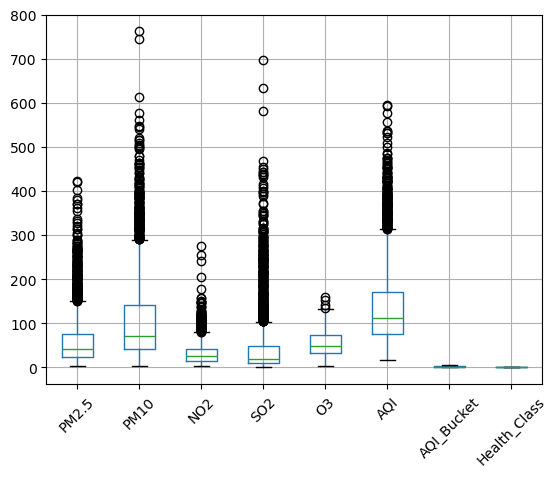

In [23]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [24]:
def remove_outliers(data, column):
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(upper = upper_bound)
    data[column] = data[column].clip(lower = lower_bound)
        
    return data[column]

In [25]:
for col in data:
    data[col] = remove_outliers(data, col)

In [26]:
data.shape

(3349, 8)

In [27]:
corr_matrix = data.corr()

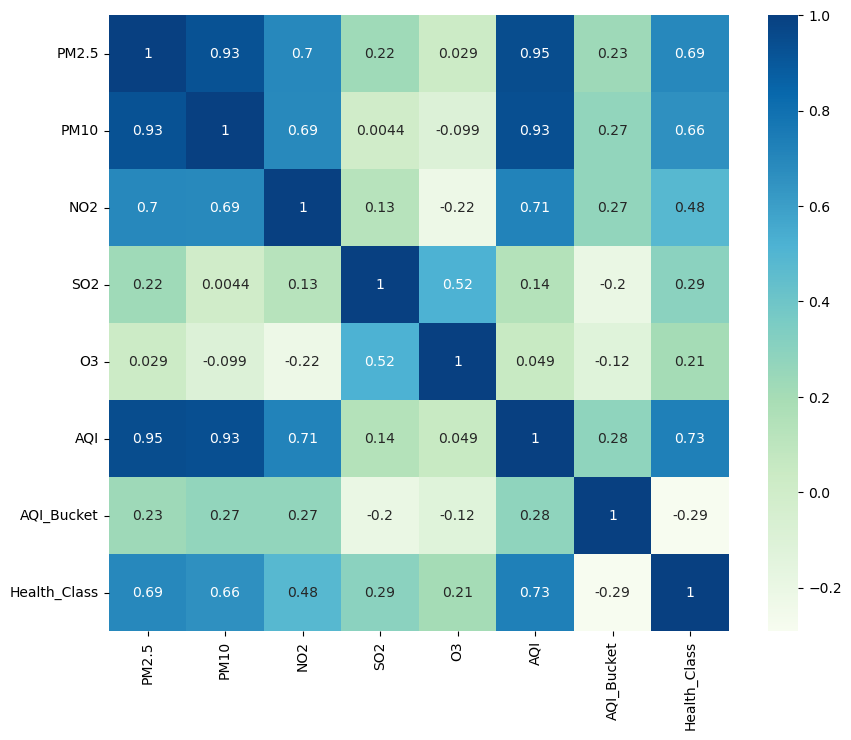

In [28]:
plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu')
plt.show()

In [29]:
data.columns

Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI', 'AQI_Bucket',
       'Health_Class'],
      dtype='object')

In [30]:
result = {'Models:' : [], 'Accuracy:' : [], 'Precision' : [], 'Recall:' : [], 'F1-Score:' : [], 'Cross-Validation Scores:' : [] } 
result_dt = pd.DataFrame(result) 
result_dt


,Models:,Accuracy:,Precision,Recall:,F1-Score:,Cross-Validation Scores:


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = data.drop(['AQI_Bucket', 'Health_Class'], axis = 1)
y = data['Health_Class']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 42)

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

In [35]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

In [36]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred))
print('Recall is:', recall_score(y_test,y_pred))
print('F1_score is:', f1_score(y_test,y_pred))

Accuracy is: 0.996268656716418
Precision is: 0.9972714870395635
Recall is: 0.9959128065395095
F1_score is: 0.9965916837082481


In [37]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(log_reg, x, y, cv = kfold_validator)
cv_mean = np.mean(cv_score)

In [38]:
cv_score

array([1.        , 0.99402985, 1.        , 0.99701493, 1.        ,
       1.        , 1.        , 0.99402985, 1.        , 0.99401198])

In [39]:
result_dt.loc[len(result_dt)] = ['Logistic Regression',accuracy_score(y_test,y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred),
f1_score(y_test,y_pred), cv_mean]

In [40]:
from sklearn.svm import SVC

In [41]:
svm_cls = SVC(kernel = 'rbf')
svm_cls = svm_cls.fit(x_train, y_train)

In [42]:
y_pred_svm = svm_cls.predict(x_test)

In [43]:
print('Accuracy is:', accuracy_score(y_test,y_pred_svm))
print('Precision is:', precision_score(y_test,y_pred_svm))
print('Recall is:', recall_score(y_test,y_pred_svm))
print('F1_score is:', f1_score(y_test,y_pred_svm))

Accuracy is: 0.9888059701492538
Precision is: 0.9877883310719131
Recall is: 0.9918256130790191
F1_score is: 0.9898028552005439


In [44]:
cv_score1 = cross_val_score(svm_cls, x, y, cv = kfold_validator)
cv_mean1 = np.mean(cv_score1)
cv_score1

array([0.99104478, 0.99701493, 0.98507463, 0.9880597 , 0.98507463,
       0.99701493, 0.99104478, 0.9880597 , 0.99701493, 0.98802395])

In [45]:
result_dt.loc[len(result_dt)] =  ['SVC',accuracy_score(y_test,y_pred_svm), precision_score(y_test,y_pred_svm), recall_score(y_test,y_pred_svm),
f1_score(y_test,y_pred_svm), cv_mean1]

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train, y_train)

In [48]:
y_pred_dt = dt_cls.predict(x_test)

In [49]:
print('Accuracy is:', accuracy_score(y_test,y_pred_dt))
print('Precision is:', precision_score(y_test,y_pred_dt))
print('Recall is:', recall_score(y_test,y_pred_dt))
print('F1_score is:', f1_score(y_test,y_pred_dt))

Accuracy is: 0.9985074626865672
Precision is: 0.9972826086956522
Recall is: 1.0
F1_score is: 0.998639455782313


In [50]:
cv_score2 = cross_val_score(dt_cls, x, y, cv = kfold_validator)
cv_mean2 = np.mean(cv_score2)
cv_score2

array([1.        , 0.99402985, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99701493, 1.        , 1.        ])

In [51]:
result_dt.loc[len(result_dt)] =  ['Decision Tree Classifier',accuracy_score(y_test,y_pred_dt), precision_score(y_test,y_pred_dt), recall_score(y_test,y_pred_dt),
f1_score(y_test,y_pred_dt), cv_mean2]

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train, y_train)

In [54]:
y_pred_rf = rf_cls.predict(x_test)

In [55]:
print('Accuracy is:', accuracy_score(y_test,y_pred_rf))
print('Precision is:', precision_score(y_test,y_pred_rf))
print('Recall is:', recall_score(y_test,y_pred_rf))
print('F1_score is:', f1_score(y_test,y_pred_rf))

Accuracy is: 0.9985074626865672
Precision is: 0.9972826086956522
Recall is: 1.0
F1_score is: 0.998639455782313


In [56]:
cv_score3 = cross_val_score(rf_cls, x, y, cv = kfold_validator)
cv_mean3 = np.mean(cv_score3)
cv_score3

array([1.        , 0.99402985, 1.        , 1.        , 1.        ,
       0.99701493, 1.        , 0.99402985, 1.        , 0.99700599])

In [57]:
result_dt.loc[len(result_dt)] =  ['Random Forest Classifier',accuracy_score(y_test,y_pred_rf), precision_score(y_test,y_pred_rf), recall_score(y_test,y_pred_rf),
f1_score(y_test,y_pred_rf), cv_mean3]

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(x_train, y_train)
y_pred_xg = xgb_model.predict(x_test)

C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
print('Accuracy is:', accuracy_score(y_test,y_pred_xg))
print('Precision is:', precision_score(y_test,y_pred_xg))
print('Recall is:', recall_score(y_test,y_pred_xg))
print('F1_score is:', f1_score(y_test,y_pred_xg))

Accuracy is: 0.9977611940298508
Precision is: 0.9959294436906377
Recall is: 1.0
F1_score is: 0.9979605710401088


In [60]:
# Stratified K-Fold CV for robustness
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score4 = cross_val_score(xgb_model, x, y, cv=skf, scoring='accuracy')
cv_mean4 = np.mean(cv_score4)

C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

In [61]:
result_dt.loc[len(result_dt)] =  ['XGB Classifier',accuracy_score(y_test,y_pred_xg), precision_score(y_test,y_pred_xg), recall_score(y_test,y_pred_xg),
f1_score(y_test,y_pred_xg), cv_mean4]

In [62]:
result_dt

,Models:,Accuracy:,Precision,Recall:,F1-Score:,Cross-Validation Scores:
0,Logistic Regression,0.996269,0.997271,0.995913,0.996592,0.997909
1,SVC,0.988806,0.987788,0.991826,0.989803,0.990743
2,Decision Tree Classifier,0.998507,0.997283,1.000000,0.998639,0.999104
3,Random Forest Classifier,0.998507,0.997283,1.000000,0.998639,0.998208
4,XGB Classifier,0.997761,0.995929,1.000000,0.997961,0.997910


In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=skf, scoring='accuracy')
grid.fit(x, y)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Score: 0.9985074626865671


In [64]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Create pipeline with SMOTE inside each fold
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression())
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=cv, scoring='f1')
print("F1 Scores across folds:", scores)
print("Mean F1 Score:", scores.mean())

F1 Scores across folds: [0.99868594 0.99868594 0.99868594 0.99868594 1.        ]
Mean F1 Score: 0.9989487516425756


In [65]:
from sklearn.preprocessing import StandardScaler
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=cv, scoring='f1_macro')
print("F1 Scores across folds:", scores)
print("Mean F1 Score:", scores.mean())

F1 Scores across folds: [0.99847941 0.99847941 0.99847941 0.99696007 0.99847642]
Mean F1 Score: 0.9981749454000148


In [66]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
print(f"ROC AUC Score: {auc:.4f}")

ROC AUC Score: 1.0000


In [67]:
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bal_acc:.4f}")

Balanced Accuracy: 0.9963


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize scaler and scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 2: Train your classifier on scaled data
rf_cls = RandomForestClassifier()
rf_cls.fit(x_train_scaled, y_train)
y_pred_rf1 = rf_cls.predict(x_test_scaled)

print('Accuracy is:', accuracy_score(y_test,y_pred_rf1))
print('Precision is:', precision_score(y_test,y_pred_rf1))
print('Recall is:', recall_score(y_test,y_pred_rf1))
print('F1_score is:', f1_score(y_test,y_pred_rf1))


Accuracy is: 0.9977611940298508
Precision is: 0.9972789115646259
Recall is: 0.9986376021798365
F1_score is: 0.9979577944179714


In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
x_train_scaled = scaler1.fit_transform(x_train)
x_test_scaled = scaler1.transform(x_test)

rf_cls = RandomForestClassifier()
rf_cls.fit(x_train_scaled, y_train)

y_pred_rf2 = rf_cls.predict(x_test_scaled)

print('Accuracy is:', accuracy_score(y_test,y_pred_rf2))
print('Precision is:', precision_score(y_test,y_pred_rf2))
print('Recall is:', recall_score(y_test,y_pred_rf2))
print('F1_score is:', f1_score(y_test,y_pred_rf2))

Accuracy is: 0.9977611940298508
Precision is: 0.9972789115646259
Recall is: 0.9986376021798365
F1_score is: 0.9979577944179714


In [70]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

y_pred_log3 = log_reg.predict(x_test_scaled)
print('Accuracy is:', accuracy_score(y_test,y_pred_log3))
print('Precision is:', precision_score(y_test,y_pred_log3))
print('Recall is:', recall_score(y_test,y_pred_log3))
print('F1_score is:', f1_score(y_test,y_pred_log3))

Accuracy is: 0.9626865671641791
Precision is: 0.9684931506849315
Recall is: 0.9632152588555858
F1_score is: 0.9658469945355191


In [71]:
xgb_cls = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_cls.fit(x_train_scaled, y_train)

y_pred_xgb4 = xgb_cls.predict(x_test_scaled)

print('Accuracy is:', accuracy_score(y_test,y_pred_xgb4))
print('Precision is:', precision_score(y_test,y_pred_xgb4))
print('Recall is:', recall_score(y_test,y_pred_xgb4))
print('F1_score is:', f1_score(y_test,y_pred_xgb4))

Accuracy is: 0.9977611940298508
Precision is: 0.9959294436906377
Recall is: 1.0
F1_score is: 0.9979605710401088


C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:49:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [72]:
print('Accuracy is:', accuracy_score(y_test,y_pred_log3))
print('Accuracy is:', accuracy_score(y_test,y_pred_rf1))
print('Accuracy is:', accuracy_score(y_test,y_pred_rf2))
print('Accuracy is:', accuracy_score(y_test,y_pred_xgb4))

Accuracy is: 0.9626865671641791
Accuracy is: 0.9977611940298508
Accuracy is: 0.9977611940298508
Accuracy is: 0.9977611940298508


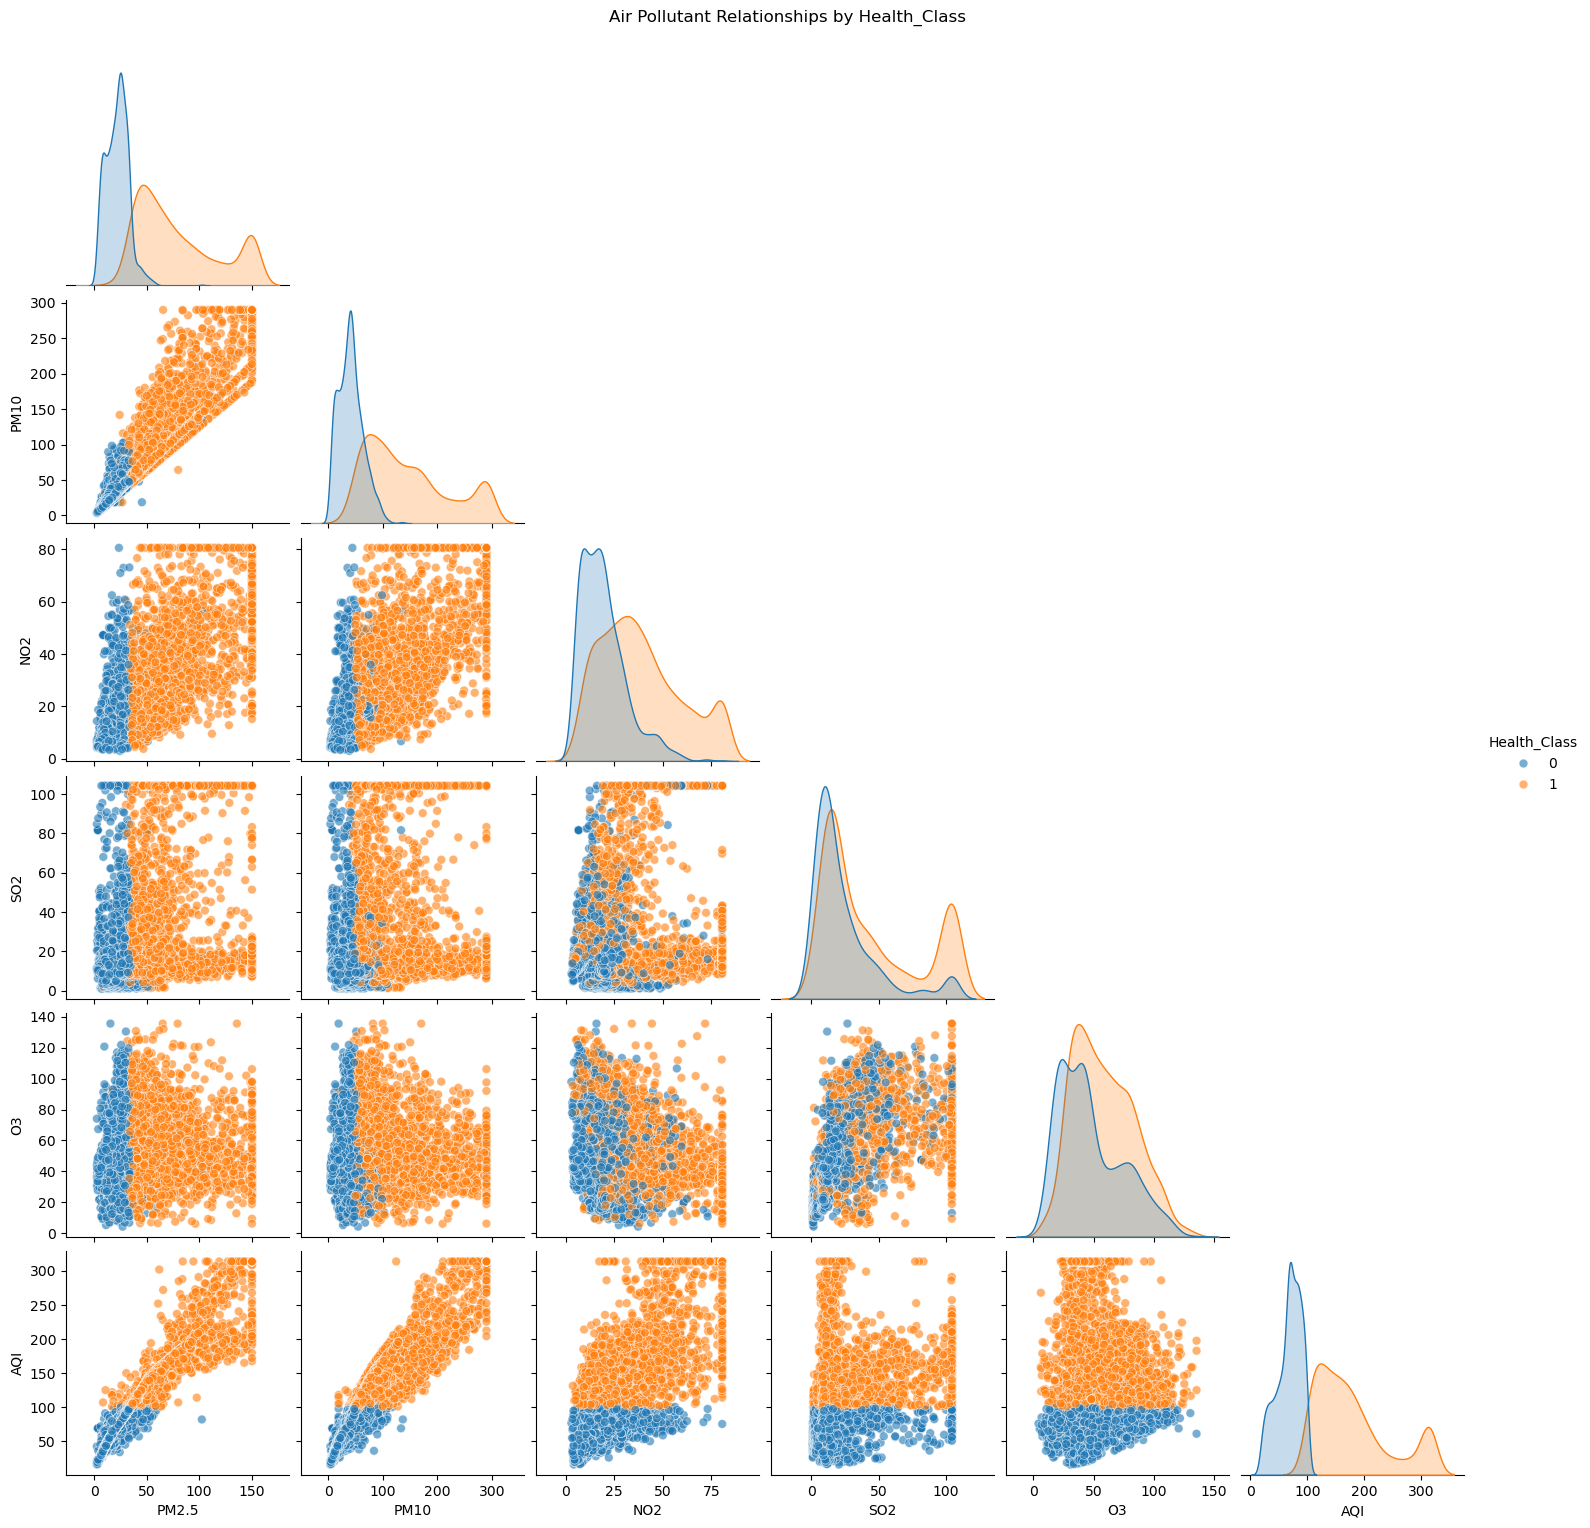

In [73]:
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI']

df_subset = data[features + ['Health_Class']]  # Include AQI category for hue

# Create the pair plot
sns.pairplot(df_subset, hue='Health_Class', diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 's': 40})  # Adjust transparency and point size
plt.suptitle("Air Pollutant Relationships by Health_Class", y=1.02)
plt.show()



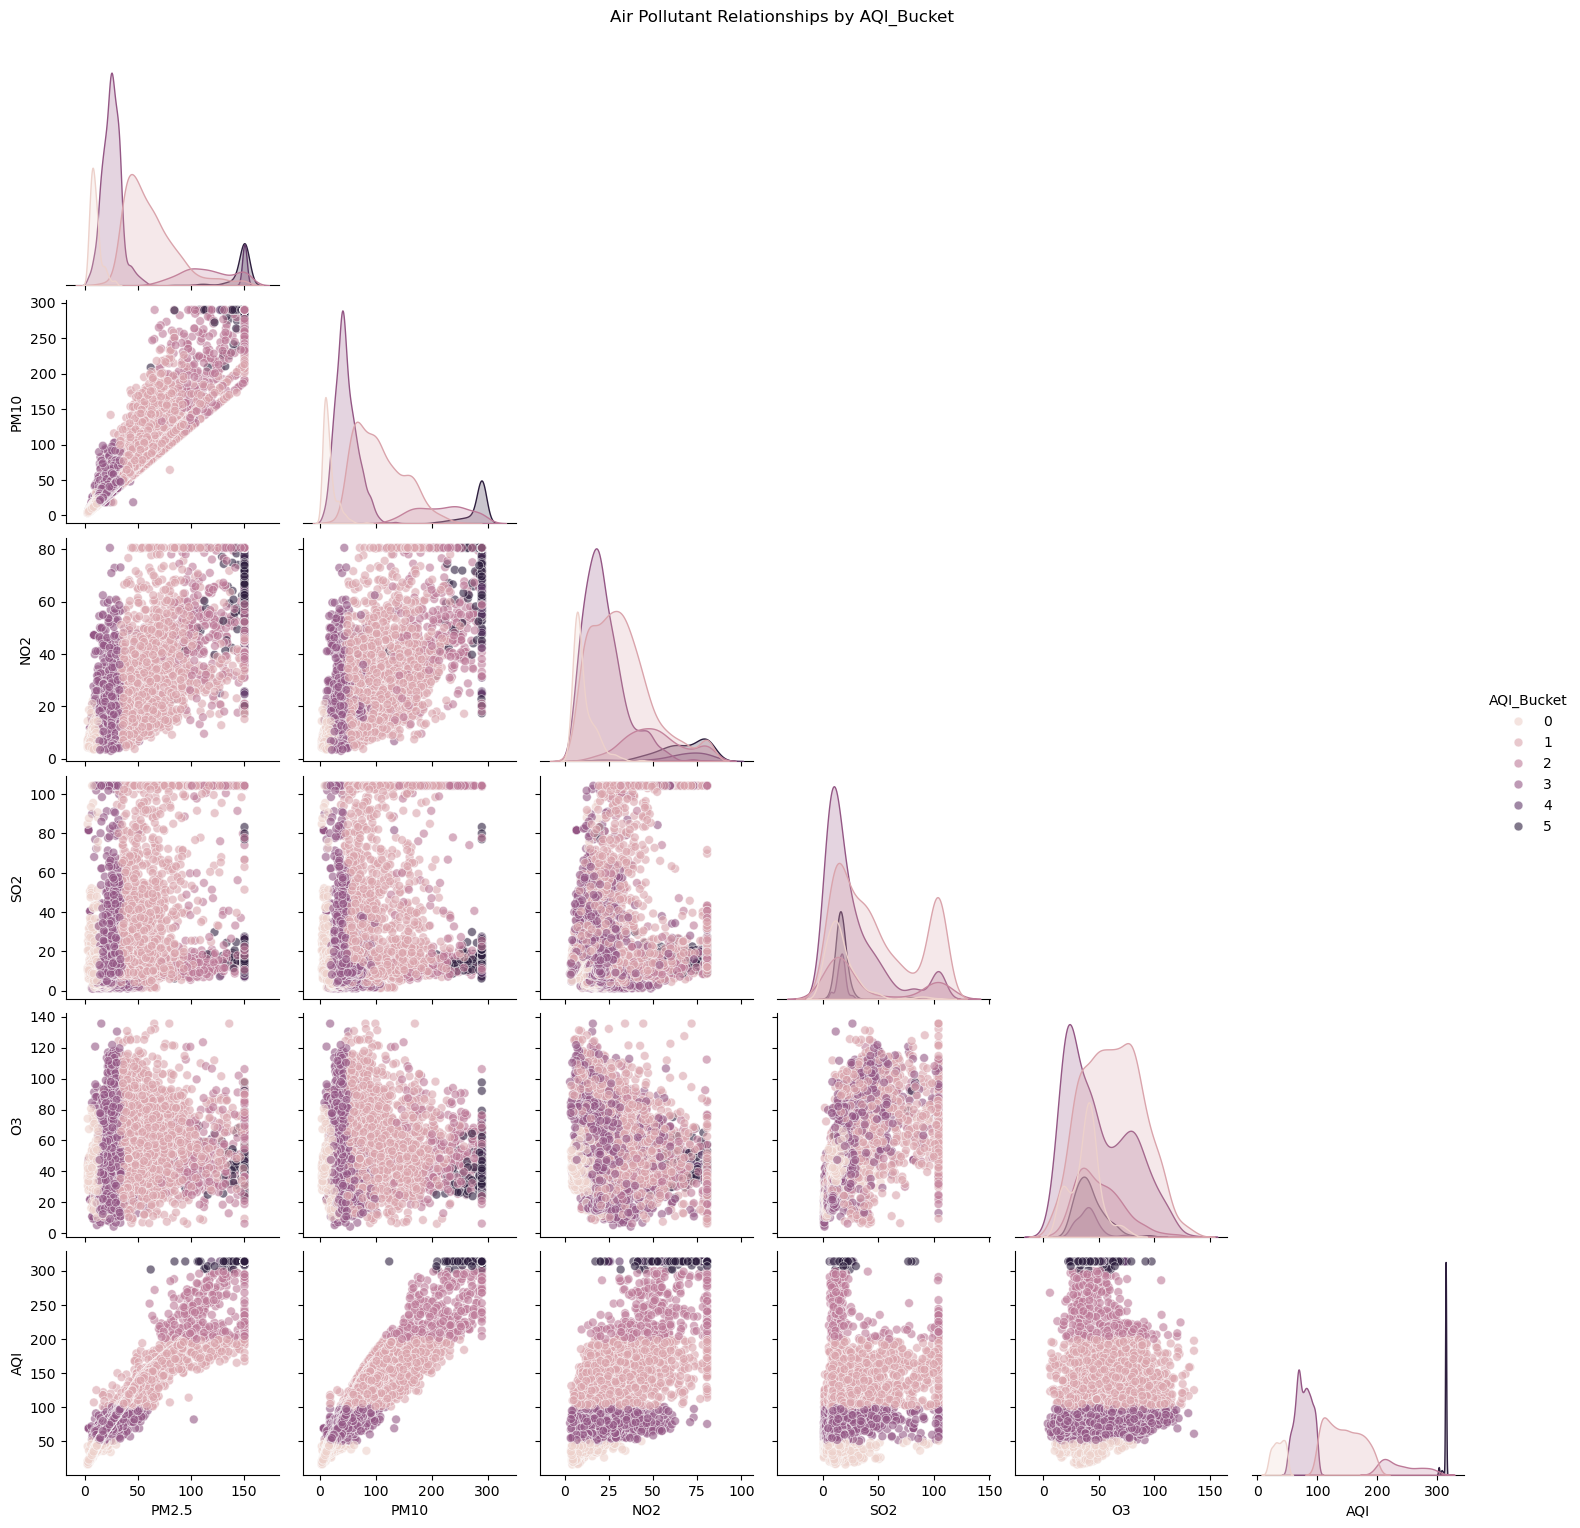

In [74]:
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'AQI']

df_subset = data[features + ['AQI_Bucket']]  # Include AQI category for hue

# Create the pair plot
sns.pairplot(df_subset, hue='AQI_Bucket', diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.6, 's': 40})  # Adjust transparency and point size
plt.suptitle("Air Pollutant Relationships by AQI_Bucket", y=1.02)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1902

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349



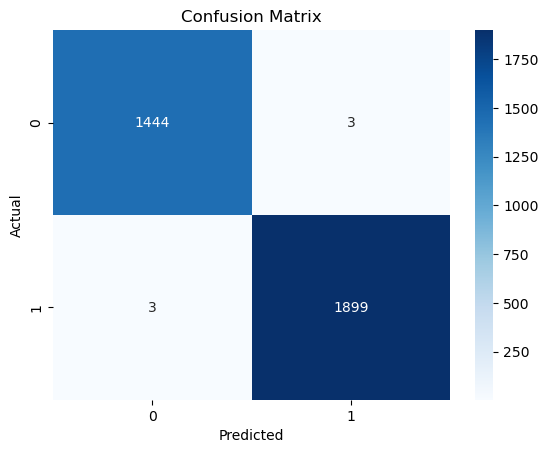

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline, x, y, cv=cv)
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [76]:
import pickle
with open("air_cls.pkl", "wb") as f:
    pickle.dump(xgb_model, f)